# Offices notebook example

In this example, a rule based controller is used to control the model "OfficesThermostat-v0". At first we import the controller:

In [1]:
import sys
sys.path.insert(0, "/home/lesong/energym")
from energym.examples.Controller import SimpleController

Next, we import Energym and create the simulation environment by specifying the model, a weather file and the number of simulation days.

In [8]:
import energym

weather = "GRC_A_Athens"
env = energym.make("OfficesThermostat-v0", weather=weather, simulation_days=300)

[OK] fmi2Instantiate: The Resource location of FMU with instance name instance1670397898 is file:///home/lesong/Energym_runs/1670397898_2614565/resources.

[WARNING] fmi2Instantiate: Argument loggingOn is set to 1
. This is not supported. loggingOn will default to '0'.

[OK] The current working directory is /home/lesong/energym/notebooks

[OK] fmi2Instantiate: Path to fmuUnzipLocation ///home/lesong/Energym_runs/1670397898_2614565//

[OK] fmi2Instantiate: Path to fmuResourceLocation ///home/lesong/Energym_runs/1670397898_2614565//resources//

[OK] Command executes to copy content of resources folder: cp -f "///home/lesong/Energym_runs/1670397898_2614565//resources//"variables.cfg "/home/lesong/energym/notebooks//Output_EPExport_instance1670397898//"

[OK] fmi2Instantiate: Path to model description file is ///home/lesong/Energym_runs/1670397898_2614565//modelDescription.xml.

[OK] fmi2Instantiate: The FMU modelIdentifier is Offices_Thermostat.

[OK] fmi2Instantiate: The FMU modelGUID is

Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "1_FLOOR_SLAB"
Calculating CTFs for "1_FLOOR_WC"
Calculating CTFs for "COURTYARD_SLAB"
Calculating CTFs for "DOOR"
Calculating CTFs for "FACADE"
Calculating CTFs for "FACADE"
Calculating CTFs for "GROUND_FLOOR_SLAB_1"
Calculating CTFs for "GROUND_FLOOR_SLAB_2"
Calculating CTFs for "PARTITION_055M"
Calculating CTFs for "PARTITION_GYPSUM"
Calculating CTFs for "PARTITION_TILE_1"
Calculating CTFs for "PARTITION_WC"
Calculating CTFs for "PARTITION_WC 1"
Calculating CTFs for "ROOF"
Calculating CTFs for "WALL_TILE"
Calculating CTFs for "WALL_TILE"
Calculating CTFs for "CONSTR_INTERNAL_MASS_TZ"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Ca

The control inputs can be inspected using the `get_inputs_names()` method and to construct a controller, we pass the list of inputs and further parameters. This controller determines inputs to get close to the temperature setpoints and uses fixed setpoints during the night.

In [9]:
inputs = env.get_inputs_names()[2:]  #Exclude heating cooling setpoint
print(inputs)
controller = SimpleController(control_list=inputs, lower_tol=0.3, upper_tol=0.8, nighttime_setback=True, nighttime_start=18, nighttime_end=6, nighttime_temp=18)

['Z01_T_Thermostat_sp', 'Z02_T_Thermostat_sp', 'Z03_T_Thermostat_sp', 'Z04_T_Thermostat_sp', 'Z05_T_Thermostat_sp', 'Z06_T_Thermostat_sp', 'Z07_T_Thermostat_sp', 'Z15_T_Thermostat_sp', 'Z16_T_Thermostat_sp', 'Z17_T_Thermostat_sp', 'Z18_T_Thermostat_sp', 'Z19_T_Thermostat_sp', 'Z20_T_Thermostat_sp', 'Z25_T_Thermostat_sp']


To run the simulation, a number of steps is specified (here 96 steps per day for 10 days) and the obtained control inputs are passed to the simulation model with the `step()` method. To generate some plots later on, we save all the inputs and outputs in lists.

In [13]:
import numpy as np
steps = 96*1
out_list = []
outputs = env.step(env.sample_random_action())
hour = 0
controls = []
for _ in range(steps):
    # control = controller.get_control(outputs, 21, hour)
    control = env.sample_random_action()
    control['Bd_Heating_onoff_sp'] = [1]
    control['Bd_Cooling_onoff_sp'] = [0]
    controls +=[ {p:control[p][0] for p in control} ]
    outputs = env.step(control)
    _,hour,_,_ = env.get_date()
    out_list.append(outputs)

Since the inputs and outputs are given as dictionaries and are collected in lists, we can simply load them as a pandas.DataFrame.

In [14]:
import pandas as pd
out_df = pd.DataFrame(out_list)
cmd_df = pd.DataFrame(controls)

To generate plots, we can directly get the data from the DataFrames, by using the key names. Displayed are the zone temperatures and the setpoints determined by the controller for zone 17, the external temperature, and the total power demand.

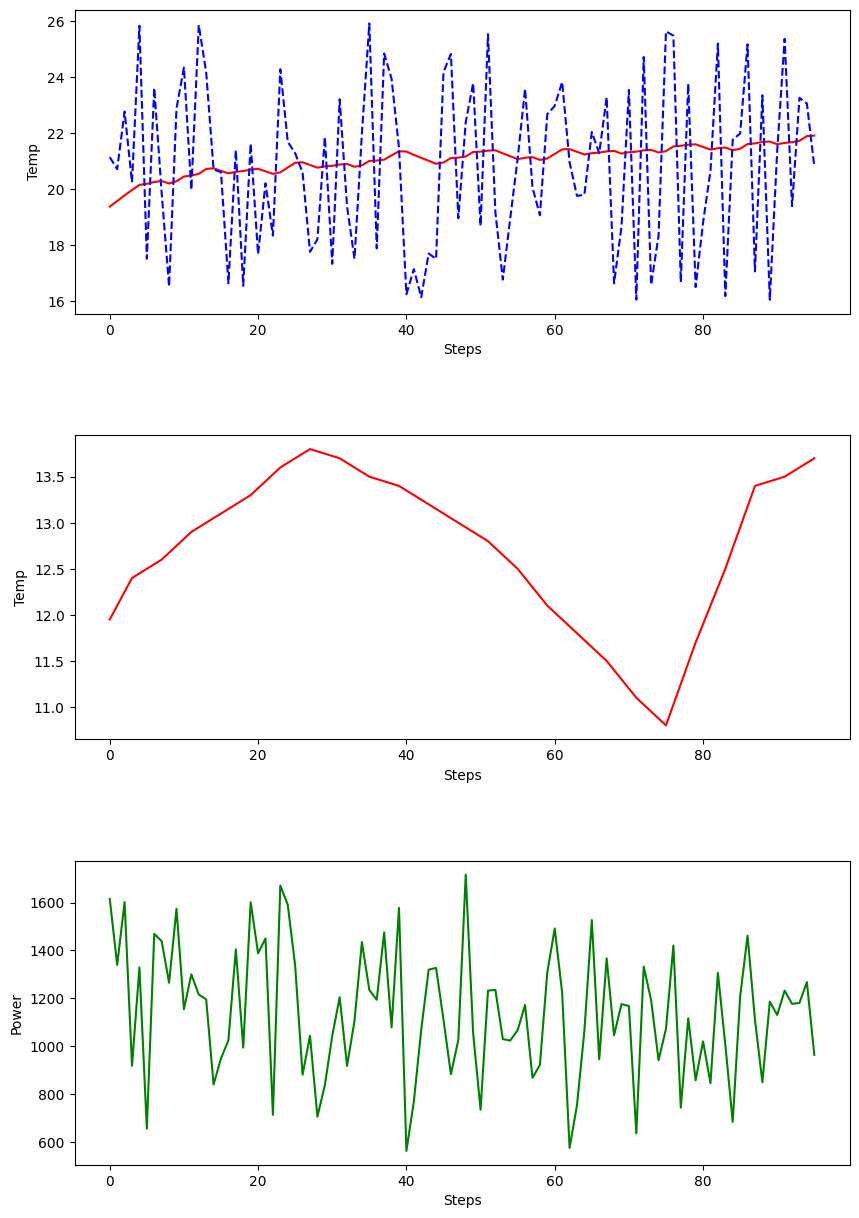

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

f, (ax1,ax2,ax3) = plt.subplots(3,figsize=(10,15))


ax1.plot(out_df['Z17_T'], 'r')
ax1.plot(out_df['Z17_T_Thermostat_sp_out'], 'b--')
ax1.set_ylabel('Temp')
ax1.set_xlabel('Steps')

ax2.plot(out_df['Ext_T'], 'r')
ax2.set_ylabel('Temp')
ax2.set_xlabel('Steps')

ax3.plot(out_df['Fa_Pw_All'], 'g')
ax3.set_ylabel('Power')
ax3.set_xlabel('Steps')

plt.subplots_adjust(hspace=0.4)

plt.show()

To end the simulation, the `close()` method is called. It deletes files that were produced during the simulation and stores some information about the simulation in the *runs* folder.

In [7]:
env.close()

[OK] fmi2Terminate: fmiFreeInstanceSlave must be called to free the FMU instance.

[OK] fmi2FreeInstance: The function fmi2FreeInstance of instance instance1670397838 is executed.

Updating Shadowing Calculations, Start Date=01/21/2007
Continuing Simulation at 01/21/2007 for UNTITLED (01-01:31-12)
Updating Shadowing Calculations, Start Date=02/10/2007
Continuing Simulation at 02/10/2007 for UNTITLED (01-01:31-12)
Updating Shadowing Calculations, Start Date=03/02/2007
Continuing Simulation at 03/02/2007 for UNTITLED (01-01:31-12)
Updating Shadowing Calculations, Start Date=03/22/2007
Continuing Simulation at 03/22/2007 for UNTITLED (01-01:31-12)
Updating Shadowing Calculations, Start Date=04/11/2007
Continuing Simulation at 04/11/2007 for UNTITLED (01-01:31-12)
Updating Shadowing Calculations, Start Date=05/01/2007
Continuing Simulation at 05/01/2007 for UNTITLED (01-01:31-12)
Updating Shadowing Calculations, Start Date=05/21/2007
Continuing Simulation at 05/21/2007 for UNTITLED (01-01:

EnergyPlus Completed Successfully.
